# Module 03

## Session 05 Data Preparation & Feature Engineering

# Feature Engineering: Tree

In this chapter, we will making machine learning model on:
* data: tips
* target: tip
* preprocess v1:
    1. one hot encoding: sex, smoker, time
    2. ordinal engcoding: day
    3. no treatment: size, total_bill
* preprocess v2:
    1. one hot encoding: sex, smoker
    2. ordinal encoding: time, day
    3. no treatment: size, total_bill
* random state = 10, data splitting 70:30, model Tree (max_depth=3)

## Library

In [28]:
# dataframe
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer

# model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

# validation
from sklearn.metrics import mean_squared_error

## Data

In [2]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Preprocessing Scheme 1

In [40]:
onehot_var_1 = ['sex', 'smoker', 'time']
onehot_1 = OneHotEncoder()

ordinal_var_1 = ['day']
ordinal_mapping_1 = [
    {
        'col':'day',
        'mapping':{
            None:0,
            'Thur':1,
            'Fri':2,
            'Sat':3,
            'Sun':4
        }
    }
]

ordinal_encoder_1 = ce.OrdinalEncoder(cols=ordinal_var_1, mapping=ordinal_mapping_1)

In [41]:
transformer1 = ColumnTransformer([
    ('one hot', onehot_1, onehot_var_1),
    ('ordinal', ordinal_encoder_1, ordinal_var_1)
], remainder='passthrough')

## Preprocessing Scheme 2

In [42]:
onehot_var_2 = ['sex', 'smoker']
onehot_2 = OneHotEncoder()

ordinal_var_2 = ['day', 'time']
ordinal_mapping_2 = [
    {
        'col':'day',
        'mapping':{
            None:0,
            'Thur':1,
            'Fri':2,
            'Sat':3,
            'Sun':4
        }
    },

    {
        'col':'time',
        'mapping':{
            None:0,
            'Lunch':1,
            'Dinner':2
        }
    }
]

ordinal_encoder_2 = ce.OrdinalEncoder(cols=ordinal_var_2, mapping=ordinal_mapping_2)

In [43]:
transformer2 = ColumnTransformer([
    ('one hot', onehot_2, onehot_var_2),
    ('ordinal', ordinal_encoder_2, ordinal_var_2)
], remainder='passthrough')

## Data Splitting

In [44]:
var = ['sex', 'smoker', 'time', 'day', 'total_bill', 'size']

X = tips[var]
y = tips['tip']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=10
)

## Preprocess Fitting 1

* preprocess v1:
    1. one hot encoding: sex, smoker, time
    2. ordinal engcoding: day
    3. no treatment: size, total_bill

In [46]:
X_train_prep1 = transformer1.fit_transform(X_train)
X_test_prep1 = transformer1.transform(X_test)

/Users/deris/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [47]:
X_train_prep1

array([[ 0.  ,  1.  ,  0.  , ...,  3.  , 11.24,  2.  ],
       [ 0.  ,  1.  ,  1.  , ...,  4.  , 10.34,  3.  ],
       [ 0.  ,  1.  ,  1.  , ...,  4.  , 21.01,  3.  ],
       ...,
       [ 0.  ,  1.  ,  1.  , ...,  3.  , 13.28,  2.  ],
       [ 1.  ,  0.  ,  1.  , ...,  1.  , 29.8 ,  6.  ],
       [ 0.  ,  1.  ,  1.  , ...,  4.  , 14.78,  2.  ]])

## Modeling

In [64]:
model1 = DecisionTreeRegressor(max_depth=3)
model1.fit(X_train_prep1, y_train)

DecisionTreeRegressor(max_depth=3)

In [65]:
y_pred_test = model1.predict(X_test_prep1)
mean_squared_error(y_test, y_pred_test)

0.8414314225960589

## Preprocess Fitting 2

* preprocess v2:
    1. one hot encoding: sex, smoker, 
    2. ordinal engcoding: day, time
    3. no treatment: size, total_bill

In [61]:
X_train_prep2 = transformer2.fit_transform(X_train)
X_test_prep2 = transformer2.transform(X_test)

/Users/deris/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [51]:
X_train_prep2

array([[ 0.  ,  1.  ,  0.  , ...,  2.  , 11.24,  2.  ],
       [ 0.  ,  1.  ,  1.  , ...,  2.  , 10.34,  3.  ],
       [ 0.  ,  1.  ,  1.  , ...,  2.  , 21.01,  3.  ],
       ...,
       [ 0.  ,  1.  ,  1.  , ...,  2.  , 13.28,  2.  ],
       [ 1.  ,  0.  ,  1.  , ...,  1.  , 29.8 ,  6.  ],
       [ 0.  ,  1.  ,  1.  , ...,  2.  , 14.78,  2.  ]])

## Model

In [62]:
model2 = DecisionTreeRegressor(max_depth=3)
model2.fit(X_train_prep1, y_train)

DecisionTreeRegressor(max_depth=3)

In [63]:
y_pred_test = model2.predict(X_test_prep1)
mean_squared_error(y_test, y_pred_test)

0.8414314225960591

## Tree & Importance (prep1)

In [75]:
importance_val = model1.feature_importances_

In [71]:
onehot_names = transformer1.transformers_[0][1].get_feature_names()

In [72]:
ordinal_names = transformer1.transformers_[1][1].get_feature_names()

In [73]:
feature_names = list(onehot_names) + list(ordinal_names) + ['total_bill', 'size']

In [76]:
importance_table = pd.DataFrame(
    {
        'imp':importance_val,
    }, index = feature_names
)

In [77]:
 importance_table

,imp
x0_Female,0.000000
x0_Male,0.000000
x1_No,0.002329
x1_Yes,0.108978
x2_Dinner,0.000000
x2_Lunch,0.000000
day,0.000000
total_bill,0.888692
size,0.000000


<AxesSubplot:>

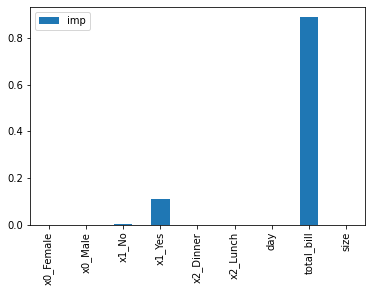

In [79]:
importance_table.plot(kind='bar')

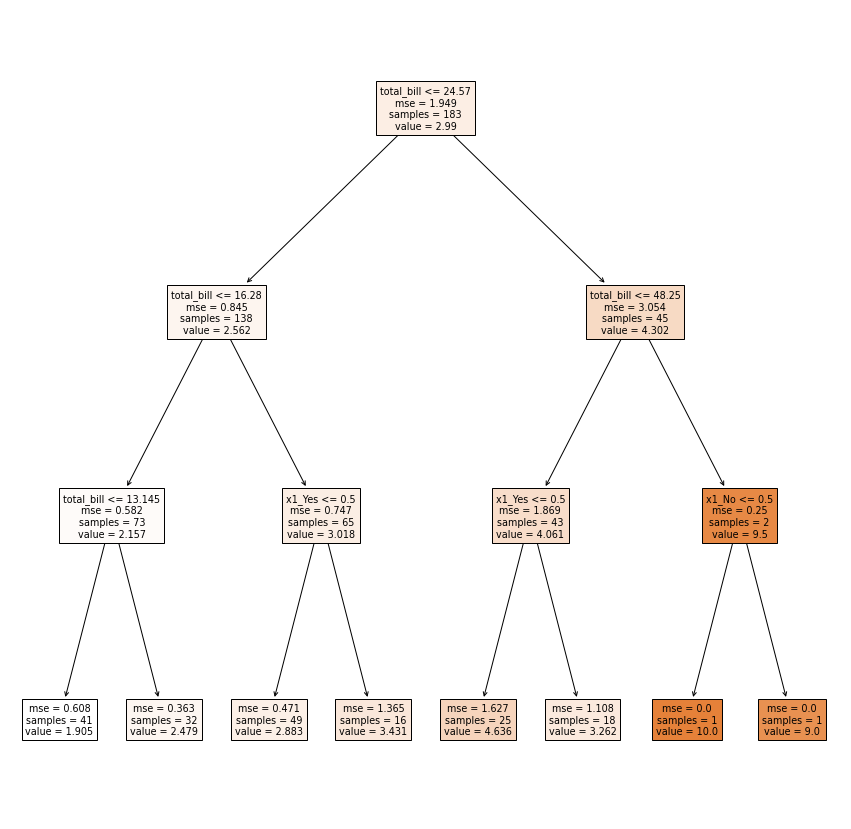

In [81]:
plt.figure(figsize=(15,15))
plot_tree(model1, feature_names=feature_names, filled=True)
plt.show()